In [1]:
from model import *
from utils import *
from scipy.stats import kstest
import pickle
import pandas as pd

from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

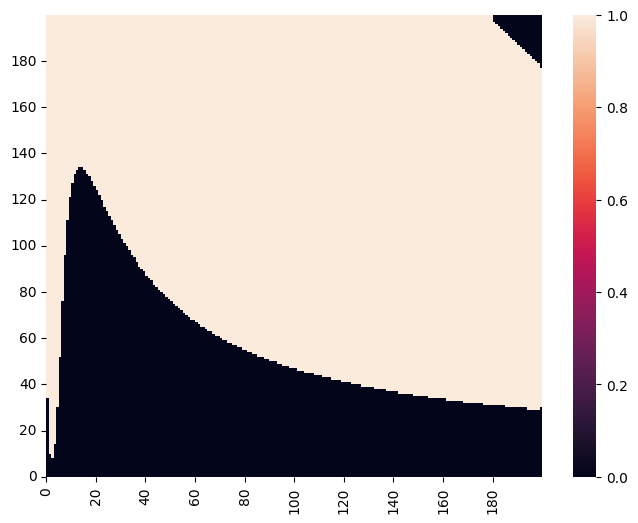

In [2]:
policy, params, _ = value_iteration(
    N=200,
    alpha=0.5,
    gamma=0.6,
    theta=0.88,
    omega=2.25,
    eta=0.88,
    beta=0.95,
    P_H_increase=0.9,
    invest_cost=1,
    health_delta=1,
    health_decrease_scale=1
)

plot_policy_boundary(policy, params)

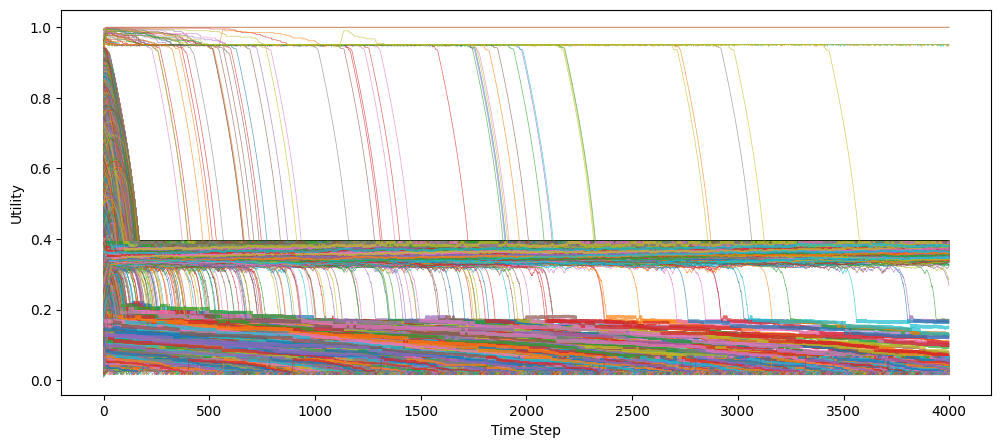

In [ ]:
num_steps = 4000
num_agents = 2000
util, wealth, health = simulate(
    params,
    policy,
    num_steps,
    num_agents
)
plot_utility_trajectories(util)

# Steady State

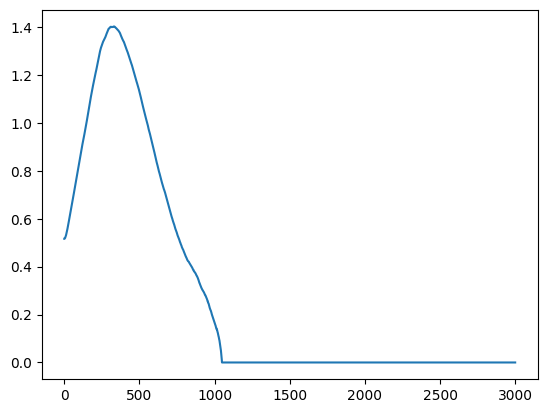

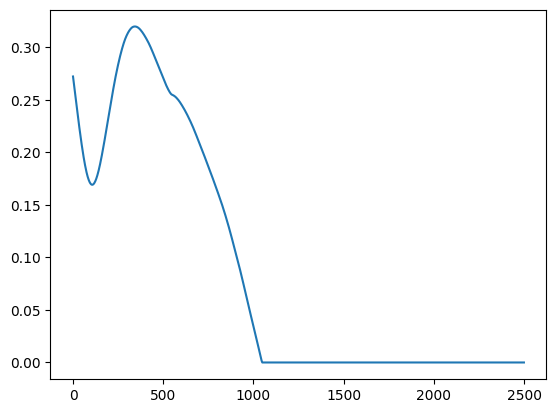

1041


In [259]:
cv = np.std(util, axis=0) / np.mean(util, axis=0)
plt.plot(cv)
plt.show()

cv_std = [np.std(cv[i:i+500]) for i in range(len(cv)-500)]
plt.plot(cv_std)
plt.show()

print(np.where(np.array(cv_std) < 0.005)[0][0])

431


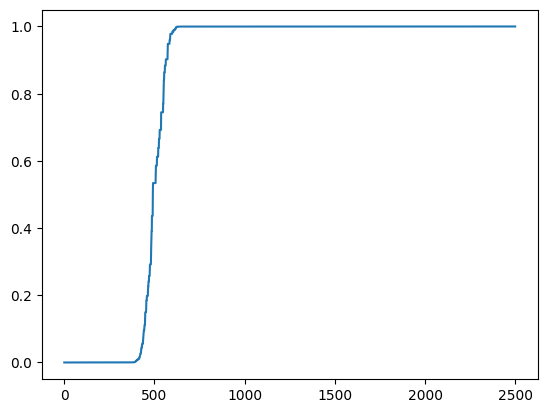

In [260]:
ks = [kstest(util[:,i], util[:,i+500]).pvalue for i in range(util.shape[1]-500)]
plt.plot(ks)
print(np.where(np.array(ks)>0.05)[0][0])

# Results

In [57]:
filepath = "results/0.9372203405946493_1_5.pickle"
with open(filepath, "rb") as f:
    res = pickle.load(f)

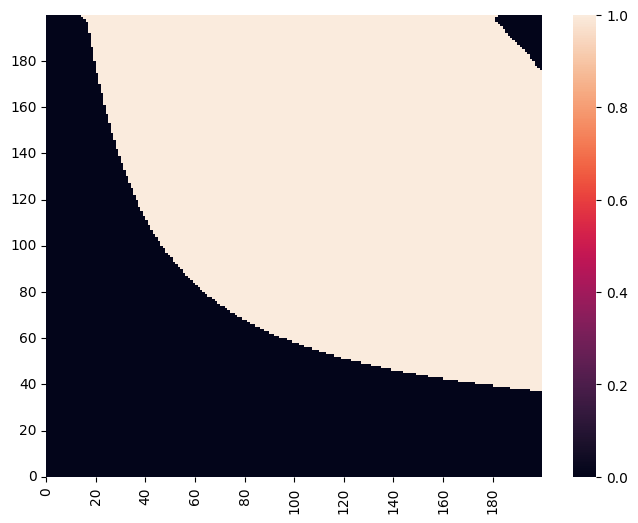

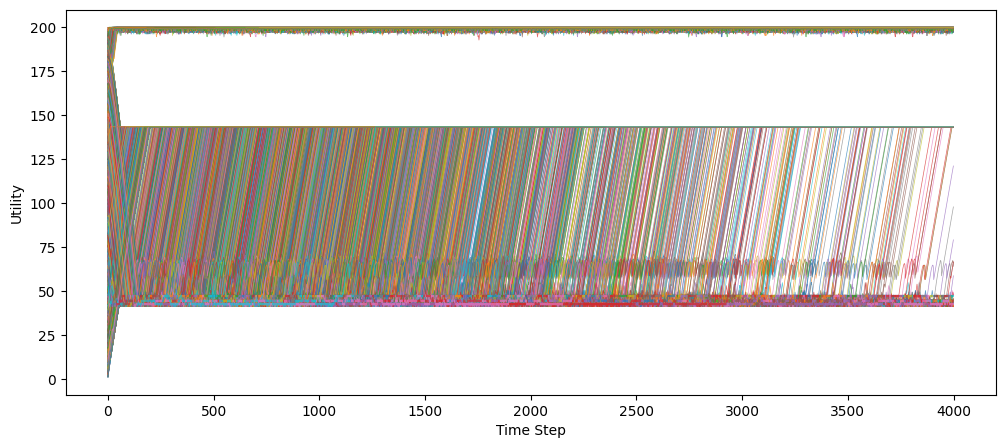

In [58]:
util = utility(res["wealth"], res["health"], alpha=res['params']['alpha'])
plot_policy_boundary(res["policy"], res["params"])
plot_utility_trajectories(util)

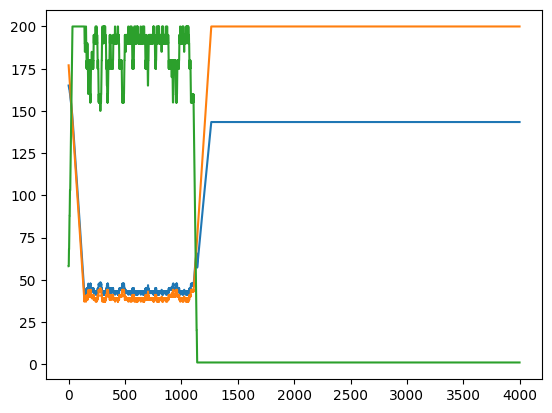

In [69]:
plt.plot(util[-1,:])
plt.plot(res["wealth"][-1,:])
plt.plot(res["health"][-1,:])
plt.show()


In [59]:
# Assuming `res` contains the data as described.
time_steps = range(0, 200, 2)
frames = []

for T in time_steps:
    wealth = res["wealth"][:, T]
    health = res["health"][:, T]
    
    x = np.linspace(min(wealth), max(wealth), 100)
    y = np.linspace(min(health), max(health), 100)
    X, Y = np.meshgrid(x, y)
    
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([wealth, health])
    
    kernel = gaussian_kde(values)
    density = np.reshape(kernel(positions).T, X.shape)
    
    # Create the 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, density, cmap='viridis', edgecolor='none')
    
    ax.set_xlabel('Wealth')
    ax.set_ylabel('Health')
    ax.set_zlabel('Density')
    ax.set_title(f'Time = {T}')
    
    # Save the frame as an image
    filename = f"animation/frame_{T}.png"
    plt.savefig(filename)
    frames.append(filename)
    plt.close(fig)

In [60]:
# Combine frames into a GIF
images = [Image.open(frame) for frame in frames]
gif_path = "3d_surface_animation.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=100, loop=0)